<a href="https://colab.research.google.com/github/RuanRodrigues10000/ML_RUAN/blob/master/PCAcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df_target=pd.DataFrame(cancer['target'],columns=['Cancer'])

In [ ]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [ ]:
data=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler

StandardScaler: Escala os dados para ter média zero e desvio padrão unitário. Sensível a outliers. Bom para dados normalmente distribuídos.

RobustScaler: Escala os dados usando o intervalo interquartil, sendo menos sensível a outliers. Bom para dados com outliers ou distribuições não normais.






In [ ]:
scaler=StandardScaler()
scaler2=RobustScaler()
scaler.fit(data)
scaler2.fit(data)

RobustScaler()

In [ ]:
scaled_data=scaler.transform(data)
scaled_data2=scaler2.transform(data)

pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca= PCA(n_components=2)

data analysis

In [ ]:
pca.fit(scaled_data2)

PCA(n_components=2)

In [ ]:
x_data=pca.transform(scaled_data2)

In [ ]:
x_data.shape

(569, 2)

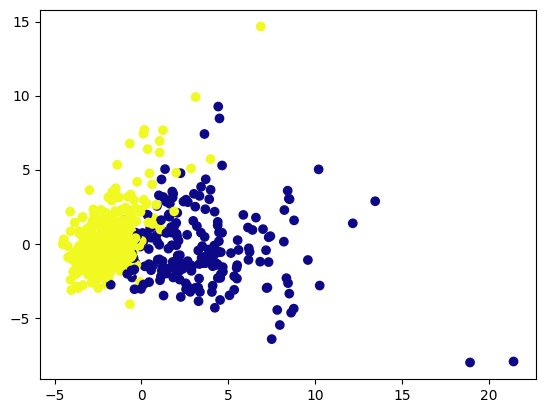

In [ ]:
plt.scatter(x_data[:,0],x_data[:,1],c=cancer['target'],cmap='plasma')

In [ ]:
data_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<Axes: >

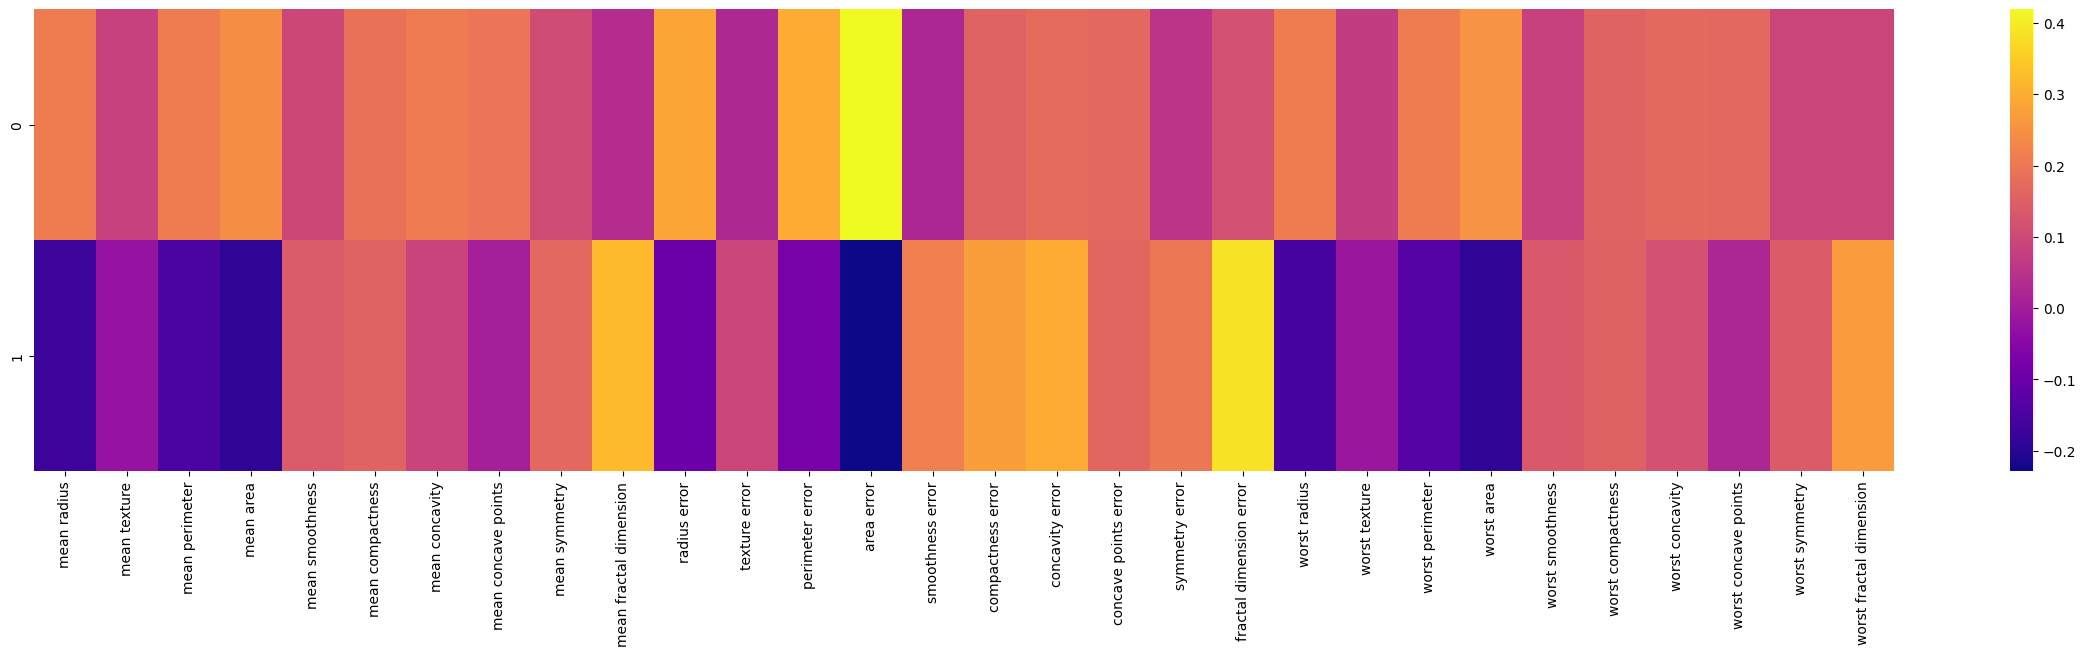

In [ ]:
plt.figure(figsize=(30,6))
sns.heatmap(data_comp,cmap="plasma")

Análise de correlação entre características: O mapa de calor pode mostrar a correlação entre diferentes características (como genes, marcadores biológicos, etc.) e as classes de câncer (0 ou 1). Áreas mais claras ou escuras podem indicar uma correlação mais forte ou mais fraca entre as características e as classes.

O gráfico de mapa de calor é uma forma de visualizar dados tabulares onde as células são coloridas com base no valor que elas representam. Cada célula no gráfico representa um par de coordenadas (linha, coluna) do conjunto de dados, e a cor da célula indica o valor numérico correspondente.

O que o gráfico quer dizer depende do contexto do conjunto de dados data_comp que você está visualizando. No entanto, aqui estão algumas interpretações comuns para um gráfico de mapa de calor:

Identificação de padrões visuais: O gráfico pode revelar padrões visuais nos dados, como clusters de valores similares, gradientes suaves ou mudanças abruptas em certas áreas.

Análise de correlação: Se o conjunto de dados data_comp contiver medidas de correlação entre diferentes variáveis, o mapa de calor pode destacar quais variáveis estão mais fortemente correlacionadas (valores mais claros ou mais escuros indicam maior ou menor correlação, respectivamente).

Comparação de valores: Você pode usar o mapa de calor para comparar valores em diferentes partes do conjunto de dados. As cores mais claras ou mais escuras indicam valores mais altos ou mais baixos, respectivamente.

Identificação de outliers: Valores extremos (outliers) podem ser facilmente identificados no mapa de calor por suas cores contrastantes em relação aos valores circundantes.

Distribuição de dados: Você pode ter uma ideia geral da distribuição dos dados ao observar como as cores estão distribuídas no mapa de calor.

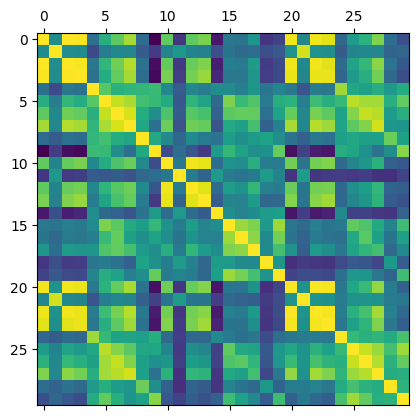

In [ ]:
plt.matshow(data.corr())
plt.show()